Imports

In [54]:
import math
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV, cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from itertools import combinations

from sklearn.metrics import RocCurveDisplay

from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score


from sklearn.metrics import (
    precision_score,
    recall_score,
    roc_auc_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    PrecisionRecallDisplay,
    RocCurveDisplay
)


## Description of the data

Variables Table

| Variable Name | Role | Type | Demographic | Description | Units | Missing Values |
|---------------|------|------|-------------|-------------|-------|----------------|
| age           | Feature | Integer | Age | | | no |
| job | Feature | Categorical | Occupation | type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') | | no |
| marital | Feature | Categorical | Marital Status | marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed) | | no |
| education | Feature | Categorical | Education Level | (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') | | no |
| default | Feature | Binary | | has credit in default? | | no |
| housing | Feature | Binary | | has housing loan? | | no |
| loan | Feature | Binary | | has personal loan? | | no |
| contact | Feature | Categorical | | contact communication type (categorical: 'cellular','telephone') | | yes |
| day_of_week | Feature | Date | | last contact day of the week | | no |
| month | Feature	 | Date | | last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec') | | no |
| duration | Feature | Integer | | last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. | | no |
| campaign | Feature | Integer | | number of contacts performed during this campaign and for this client (numeric, includes last contact) | | no |
| pdays | Feature | Integer | | number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted) | | yes |
| previous | Feature | Integer | | number of contacts performed before this campaign and for this client | | no |
| poutcome | Feature | Categorical | | outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success') | | yes |
| emp.var.rate | Feature | float64 | | Employment variation rate, with a quarterly frequency | | no |
| cons.price.idx | Feature | float64 | | Monthly average consumer price index | | no |
| cons.conf.idx | Feature | float64 | | Monthly average consumer confidence index | | no |
| euribor3m | Feature | float64 | | Daily three month Euribor rate | | no |
| nr.employed | Feature | float64 | | Quarterly average of the total number of employed citizens | | no |
| y	| Target | Binary | | has the client subscribed a term deposit? | | |

Info data:

- Number of Instances: 41188 for bank-additional-full.csv

- Number of Attributes: 20 + output attribute.

- Attribute information:

   Input variables:
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   5 - default: has credit in default? (categorical: "no","yes","unknown")
   6 - housing: has housing loan? (categorical: "no","yes","unknown")
   7 - loan: has personal loan? (categorical: "no","yes","unknown")
   # related with the last contact of the current campaign:
   8 - contact: contact communication type (categorical: "cellular","telephone") 
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
   # other attributes:
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  14 - previous: number of contacts performed before this campaign and for this client (numeric)
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
   # social and economic context attributes
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
  20 - nr.employed: number of employees - quarterly indicator (numeric)

  Output variable (desired target):
  21 - y - has the client subscribed a term deposit? (binary: "yes","no")

- Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques. 


In [2]:
# load data
Data_bank_full = pd.read_csv('C:/Users/JennyPoelen(Companen/Pythonscripts/bank-additional-full.csv', sep=';')

In [3]:
Data_bank_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
# drop duration
Data_bank_full = Data_bank_full.drop("duration", axis='columns')

In [5]:
Data_bank_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
Data_bank_full.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
print("categorical: ")
categorical_vars=Data_bank_full.describe(include=[object]).columns
print(categorical_vars)


print("numerical: ")
continous_vars=Data_bank_full.describe().columns  #get the names of numerical variables, in this case continuous variables
print(continous_vars)



categorical: 
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')
numerical: 
Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [8]:
unknown_counts = (Data_bank_full == "unknown").sum().to_frame(name="Aantal_unknown")
unknown_counts


,Aantal_unknown
age,0
job,330
marital,80
education,1731
default,8597
housing,990
loan,990
contact,0
month,0
day_of_week,0


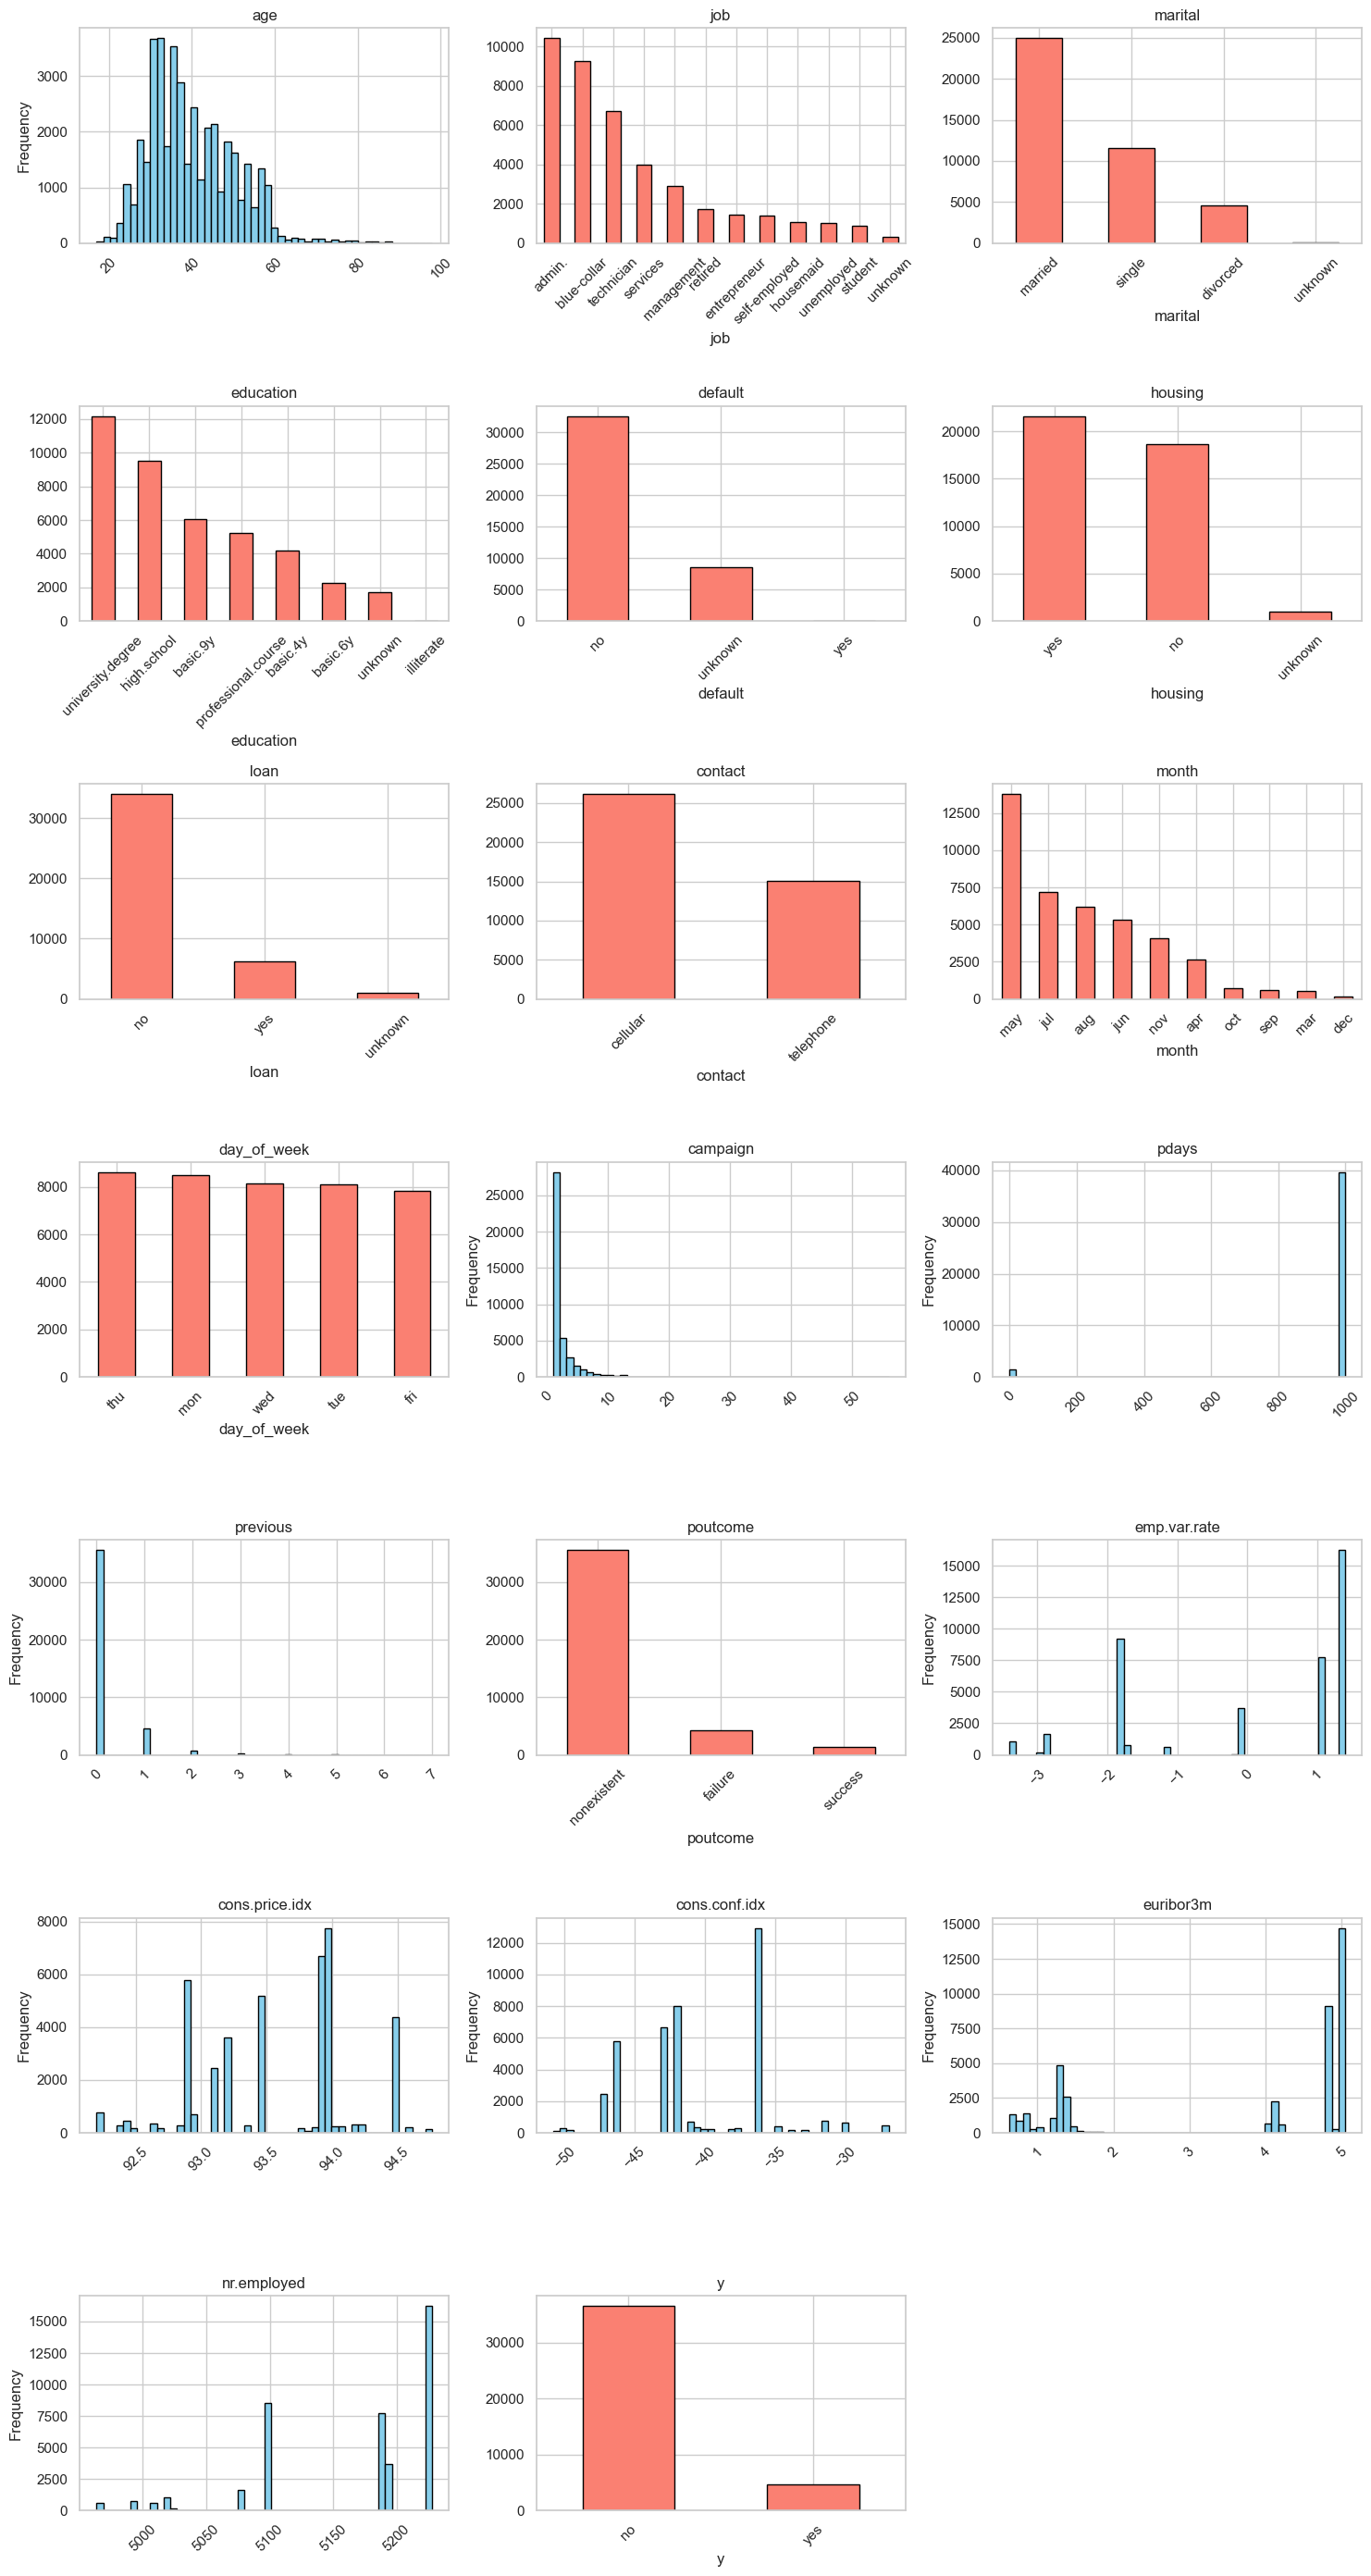

In [9]:
# Optional: use seaborn style for nicer aesthetics
sns.set(style="whitegrid")  

# Identify numeric columns
num_cols = Data_bank_full.select_dtypes(include='number').columns.tolist()

# All columns
all_cols = list(Data_bank_full.columns)
n = len(all_cols)

# Subplot layout
cols = 3
rows = math.ceil(n / cols)

# Create figure and axes
fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))
axes = axes.flatten()

for i, col in enumerate(all_cols):
    ax = axes[i]
    
    if col in num_cols:
        # Histogram for numeric columns
        Data_bank_full[col].plot.hist(
            bins=50, 
            edgecolor='black',  # fine lines around bars
            color='skyblue',
            ax=ax
        )
    else:
        # Bar plot for categorical columns
        Data_bank_full[col].value_counts().sort_values(ascending=False).plot(
            kind='bar',
            edgecolor='black',  # fine lines around bars
            color='salmon',
            ax=ax
        )
    
    ax.set_title(col, fontsize=12)
    ax.tick_params(axis='x', rotation=45)  # rotate x labels for readability

# Remove empty subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



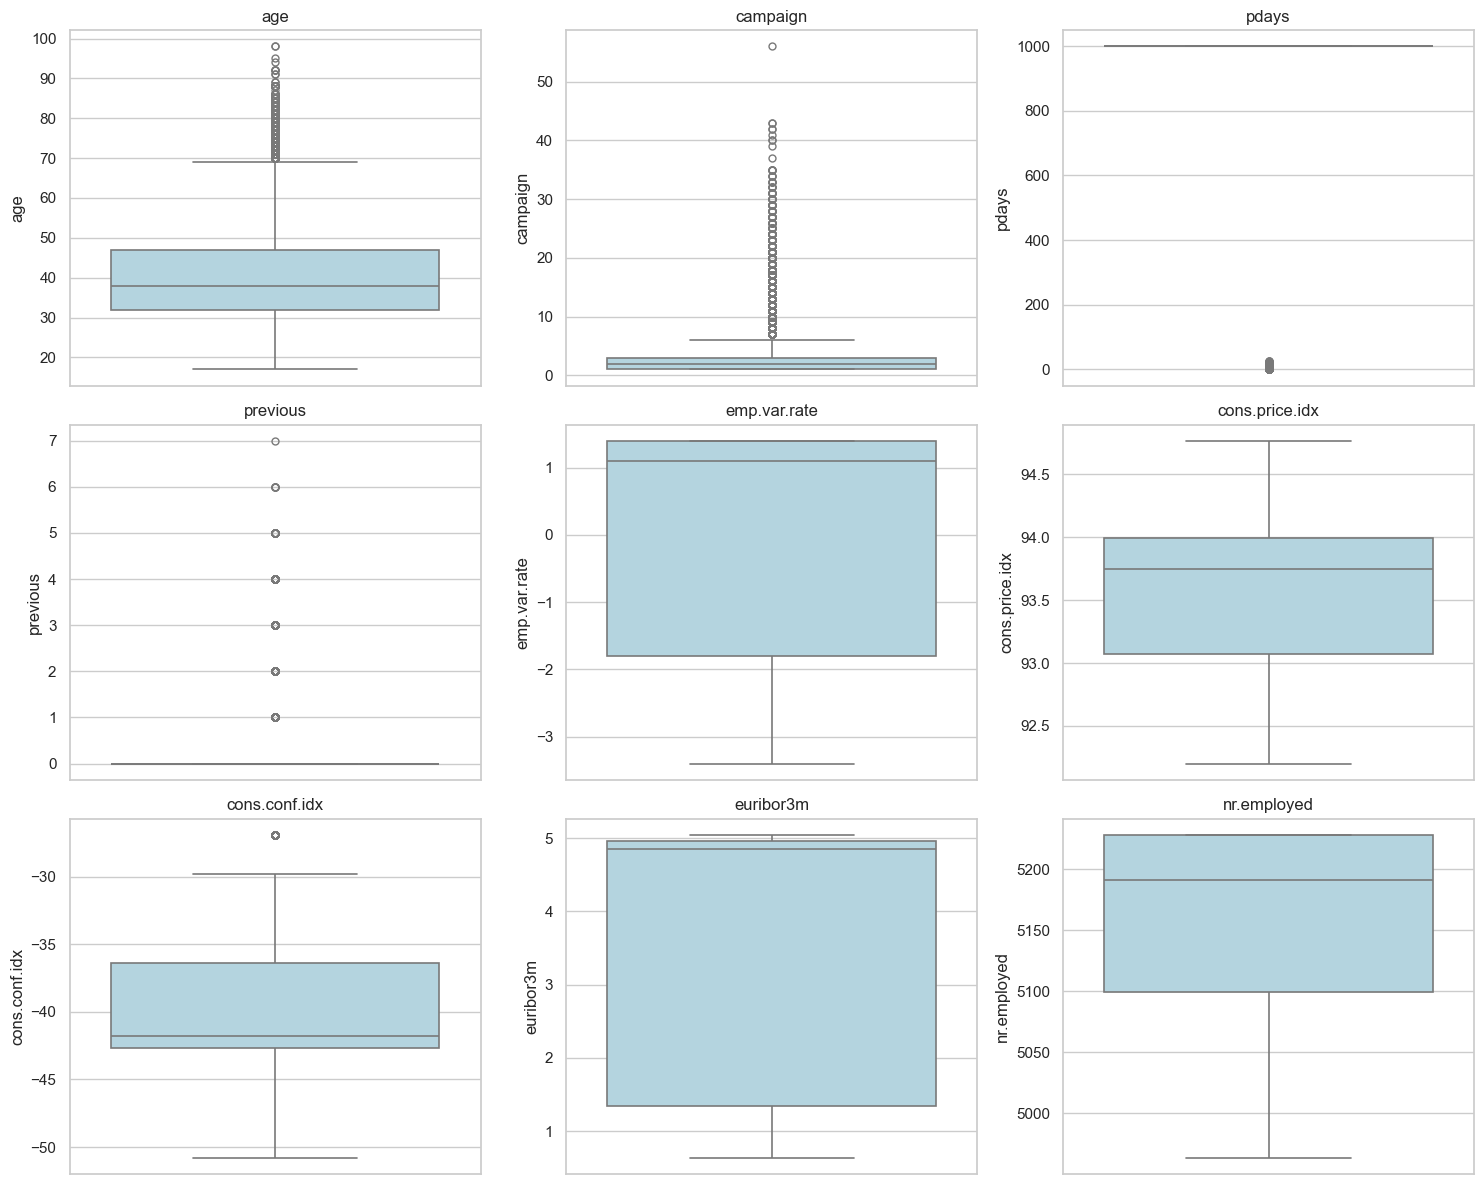

In [10]:
sns.set(style="whitegrid")  # clean background with grid

# Numeric columns only
num_cols = Data_bank_full.select_dtypes(include='number').columns.tolist()
n = len(num_cols)

# Subplot layout
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    ax = axes[i]
    
    sns.boxplot(
        y=Data_bank_full[col],
        ax=ax,
        color='lightblue',
        fliersize=5,       # size of outlier points
        linewidth=1.2      # thickness of box and lines
    )
    
    ax.set_title(col, fontsize=12)

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


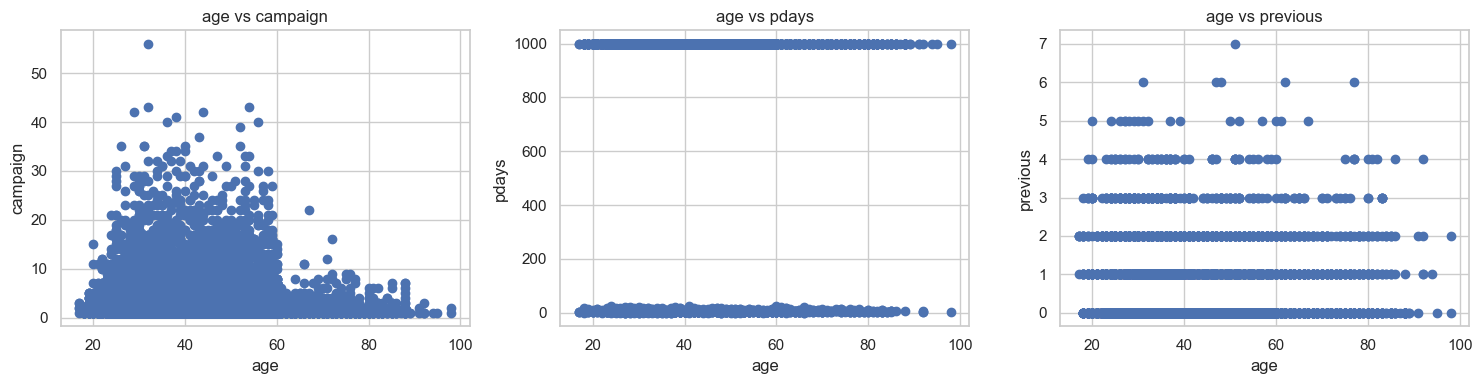

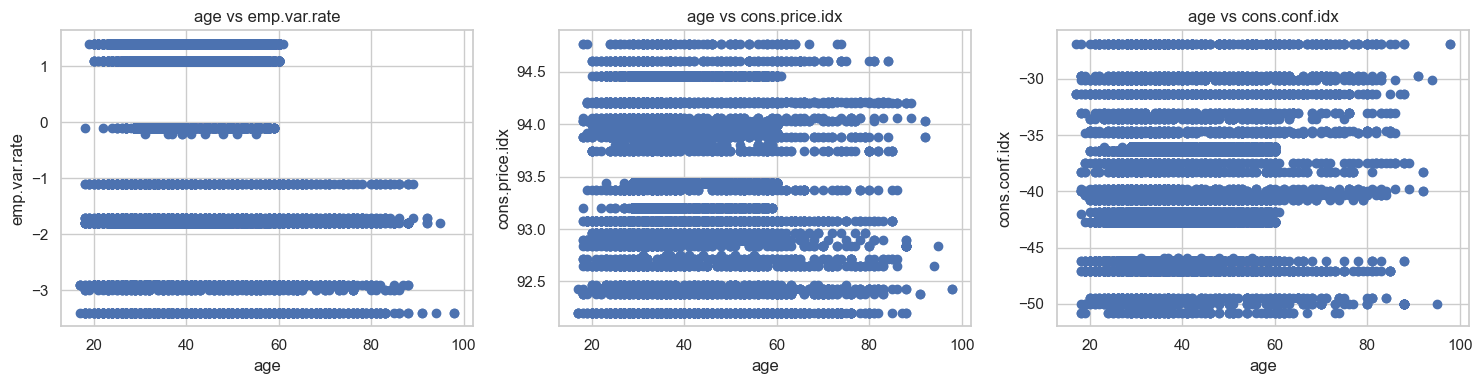

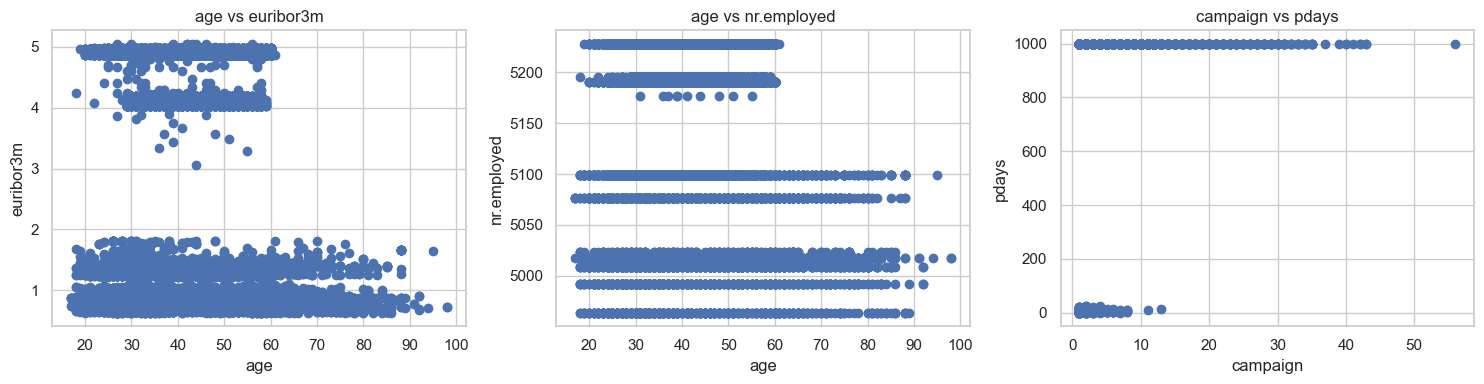

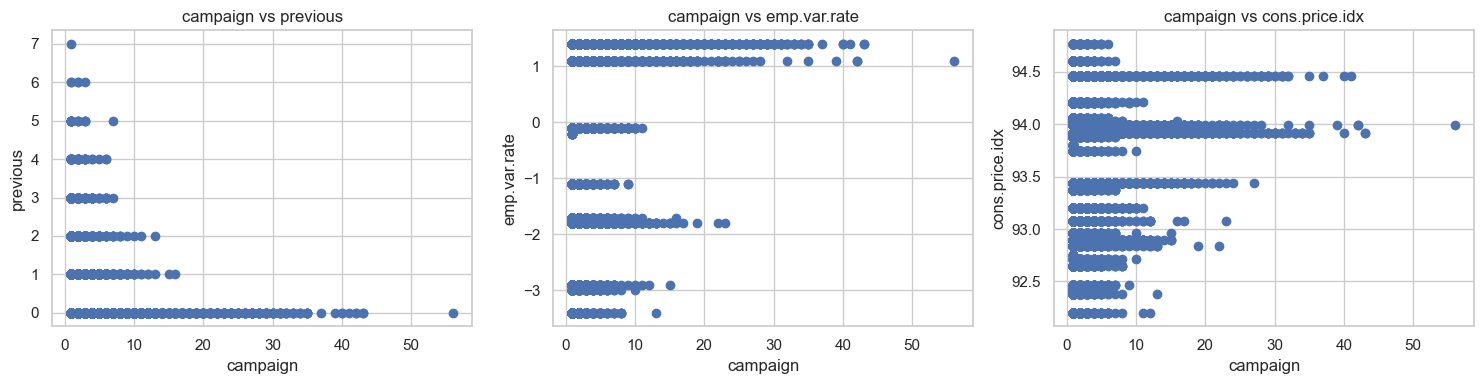

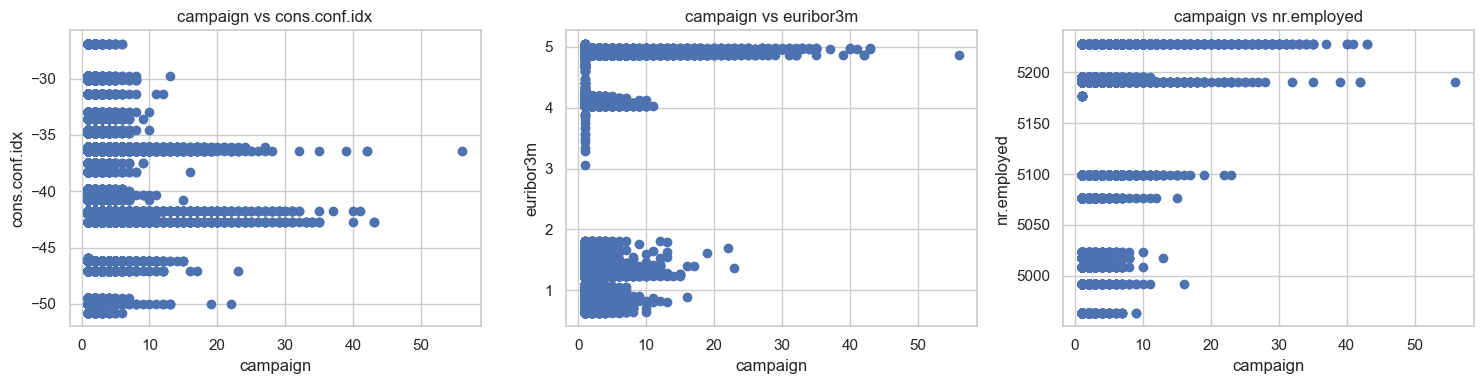

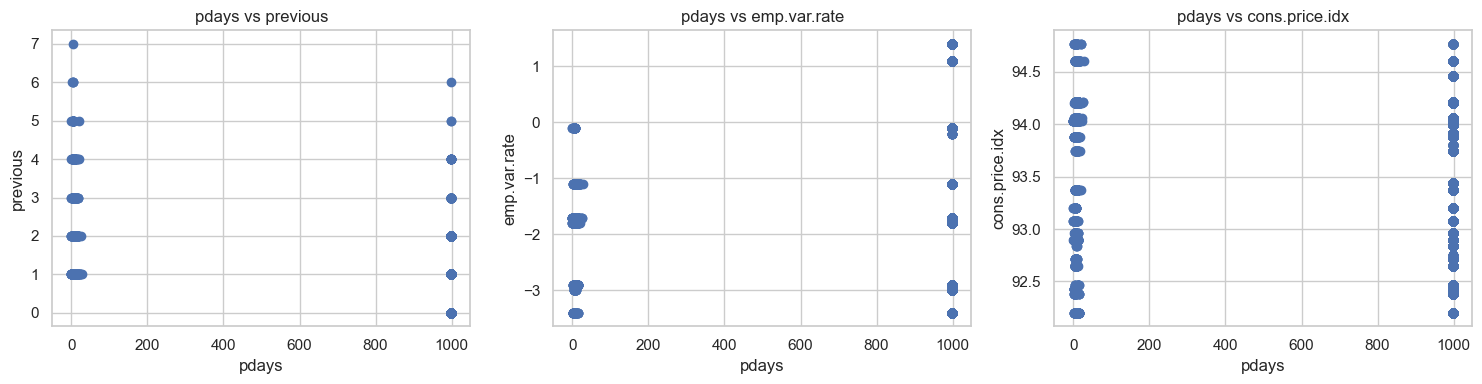

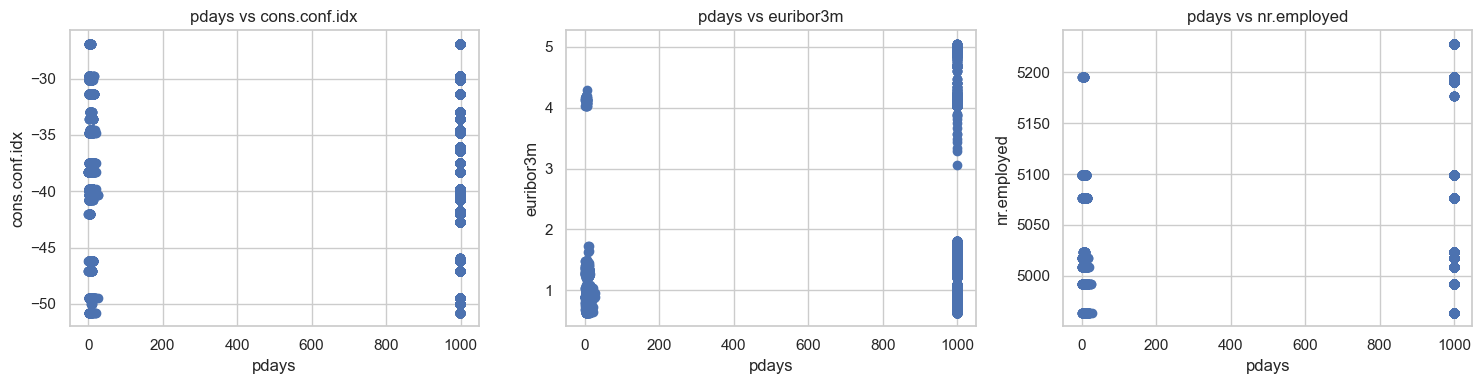

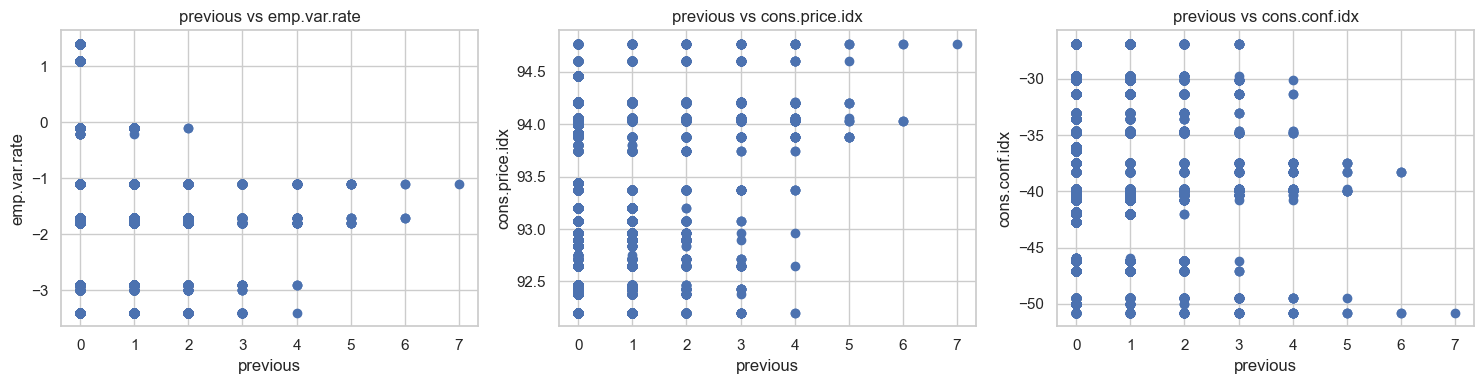

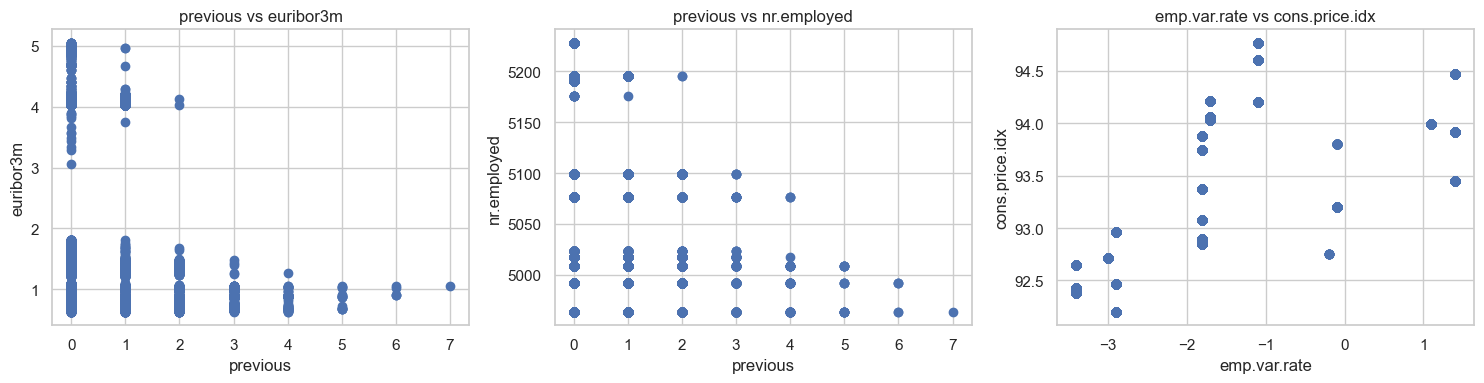

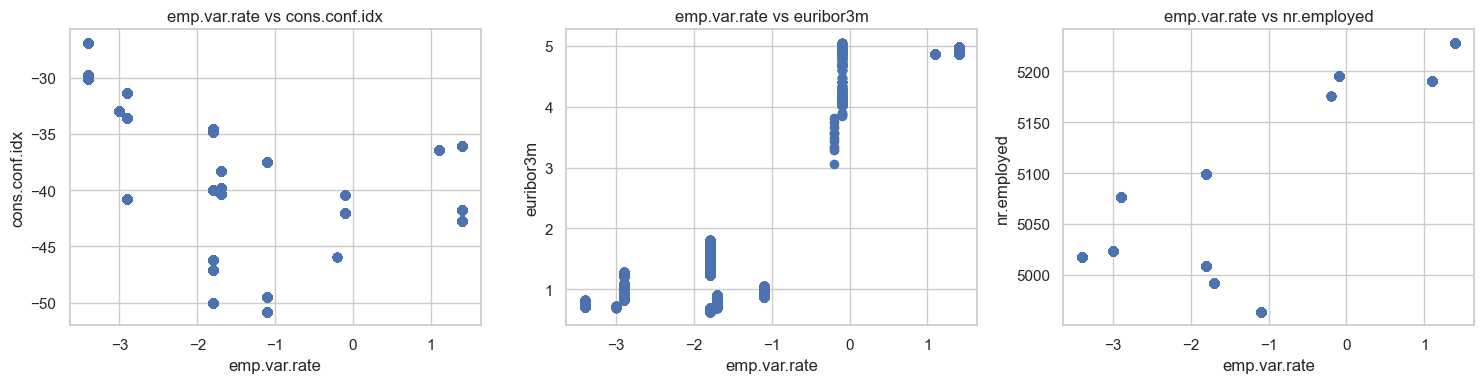

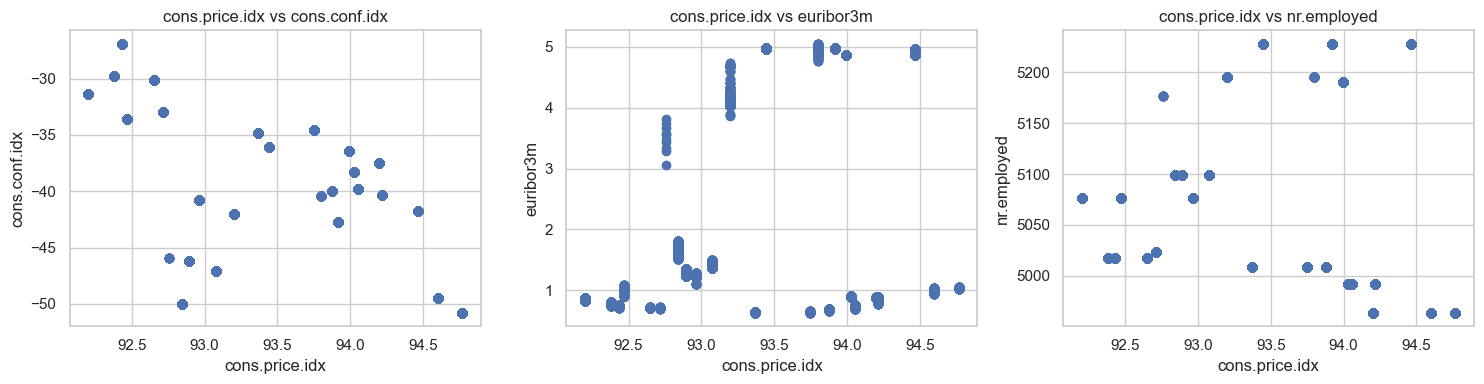

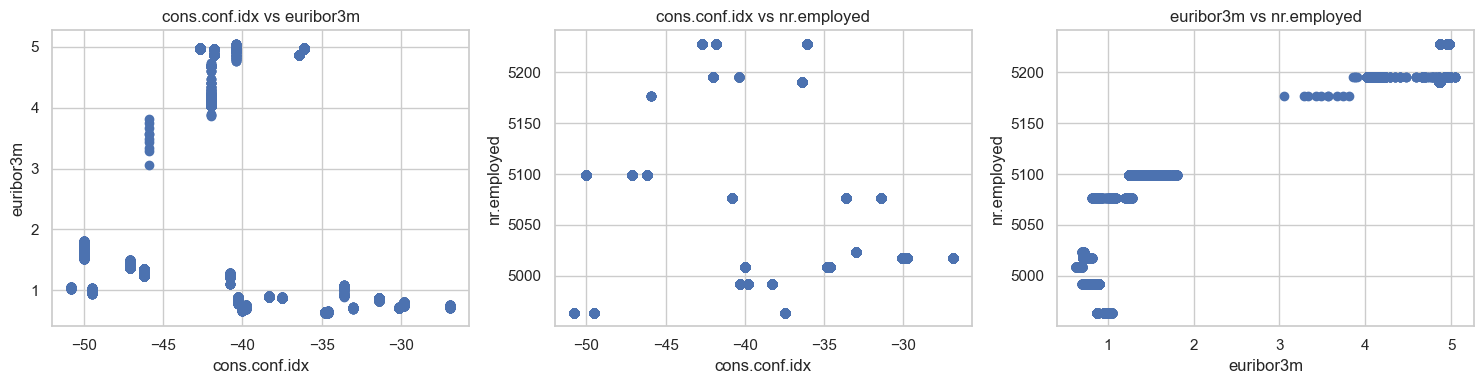

In [11]:
import matplotlib.pyplot as plt
from itertools import combinations

# Select numeric columns
numeric_cols = Data_bank_full.select_dtypes(include='number').columns.tolist()

# Create all pairs
pairs = list(combinations(numeric_cols, 2))

# How many plots per row
plots_per_row = 3

# Loop through all pairs and create subplots
for i, (x, y) in enumerate(pairs):
    
    # Start a new figure every 3 plots
    if i % plots_per_row == 0:
        fig, axes = plt.subplots(1, plots_per_row, figsize=(15, 4))
        axes = axes.flatten()

    # Determine which subplot index to use
    ax = axes[i % plots_per_row]
    
    # Scatterplot
    ax.scatter(Data_bank_full[x], Data_bank_full[y])
    ax.set_title(f"{x} vs {y}")
    ax.set_xlabel(x)
    ax.set_ylabel(y)

    # If figure is full OR last plot → show it
    if (i % plots_per_row == plots_per_row - 1) or (i == len(pairs) - 1):
        plt.tight_layout()
        plt.show()




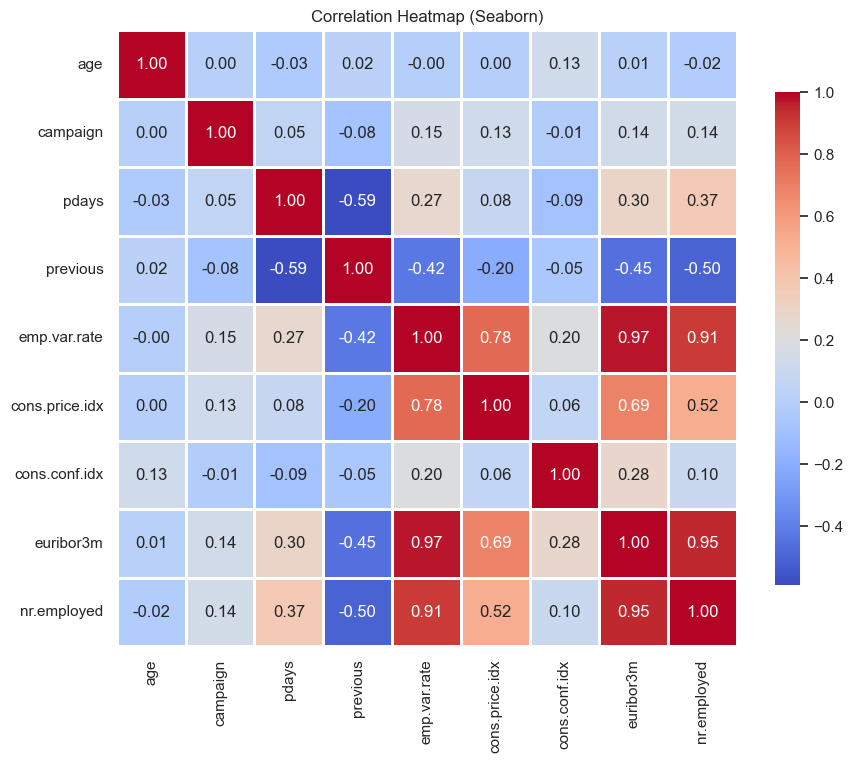

In [12]:
sns.set(style="white")  # clean background
plt.figure(figsize=(10,8))
sns.heatmap(
    Data_bank_full.select_dtypes(exclude='object').corr(), 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    linewidths=1,
    linecolor='white', 
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap (Seaborn)")
plt.show()


Split the data in X and y, Make yes 1 and no 0, split in train and test.

In [13]:
#Split in X and y
# Make yes 1 and no 0
X = Data_bank_full.drop("y", axis='columns')
y = Data_bank_full["y"].replace(to_replace={'yes': '1', 'no': '0'}).astype(int)

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [14]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 41188 entries, 0 to 41187
Series name: y
Non-Null Count  Dtype
--------------  -----
41188 non-null  int64
dtypes: int64(1)
memory usage: 321.9 KB


In [16]:
# Split training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32950, 19) (8238, 19) (32950,) (8238,)


## Prepare data and make pipeline:
- pdays → two features:
- was_contacted = 0/1 (binary, passthrough)
- pdays_clean = actual days (NaN replaced by median, scaled)
- All other numeric columns: scaling.
- All categorical columns: one-hot encoding.
- End-to-end pipeline: ready for X_test and predict().

In [17]:
# Split columns in categorical and numerical
num_features = ["age", "campaign", "pdays", "previous", "emp.var.rate", 
            "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]
cat_features = ["job", "marital", "education", "default", "housing", 
            "loan", "contact", "month", "day_of_week"]

# pdays transformation
def transform_pdays(x):
    x = x.copy()
    # 999 means: client was NOT contacted
    # anything else: contacted
    return np.where(x == 999, 0, 1).reshape(-1, 1)

pdays_transformer = FunctionTransformer(transform_pdays)

# pipelines 
cat_pipeline = Pipeline([("onehot", OneHotEncoder(handle_unknown="ignore"))])

num_pipeline = Pipeline([
    ("pdays_transform", ColumnTransformer([
        ("pdays", pdays_transformer, ["pdays"]),
        ("other_nums", StandardScaler(), [c for c in num_features if c != "pdays"])
    ], remainder="drop"))
])
    
# Full preprocessing
preprocessor = ColumnTransformer([
    ("cat", cat_pipeline, cat_features),
    ("num", num_pipeline, num_features)
])

Train models: Random Forest, KneighborsClassifier(n=5), KneighborsClassifier(n=100), Logistic Regression, Gradient boosting

Approach
- Make preprocesser pipeline first (so you have to fit only once)
- Train models:
    . Recall and Precision
    . ROC-AUC: good for probabilistically evaluating model quality
- Use cross validation to evaluate en maybe get better results with hyperparameter tuning


Make preprocesser pipeline first (so you have to fit only once)


In [20]:
# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN (5)": KNeighborsClassifier(n_neighbors=5),
    "KNN (100)": KNeighborsClassifier(n_neighbors=100),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

for name, model in models.items():
    pipeline = Pipeline([
        ("preprocessing", preprocessor),
        ("model", model)
    ])

    # train on training set
    pipeline.fit(X_train, y_train)

    # predict on test set
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)[:, 1]

    # evaluate
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    print(f"=== {name} ===")
    print(f"Precision : {precision:.3f}")
    print(f"Recall    : {recall:.3f}")
    print(f"AUC       : {auc:.3f}")
    print()



=== Random Forest ===
Precision : 0.520
Recall    : 0.275
AUC       : 0.761

=== KNN (5) ===
Precision : 0.497
Recall    : 0.280
AUC       : 0.721

=== KNN (100) ===
Precision : 0.581
Recall    : 0.185
AUC       : 0.776

=== Logistic Regression ===
Precision : 0.625
Recall    : 0.211
AUC       : 0.780

=== Gradient Boosting ===
Precision : 0.632
Recall    : 0.239
AUC       : 0.790



=== Random Forest ===
Precision : 0.632
Recall    : 0.239
AUC       : 0.790



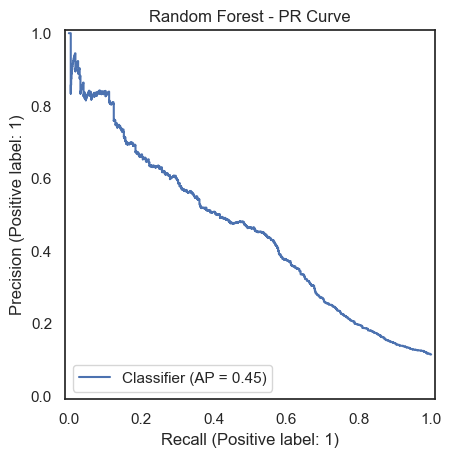

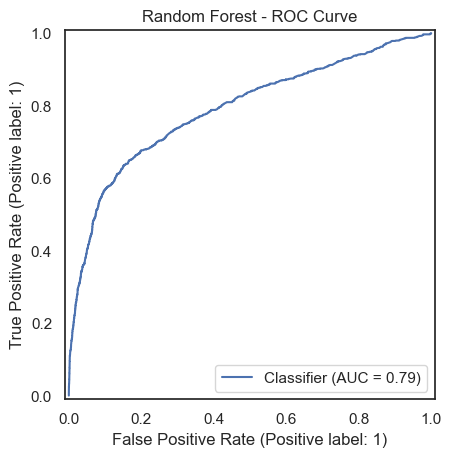

=== KNN (5) ===
Precision : 0.632
Recall    : 0.239
AUC       : 0.790



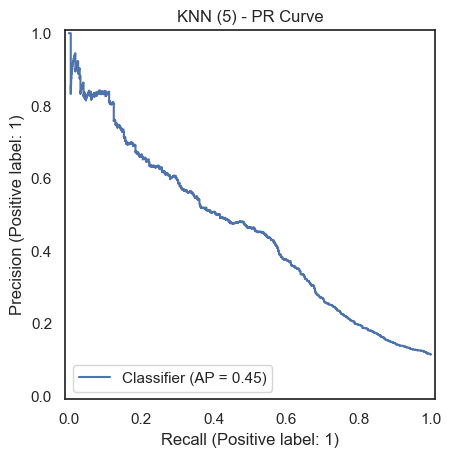

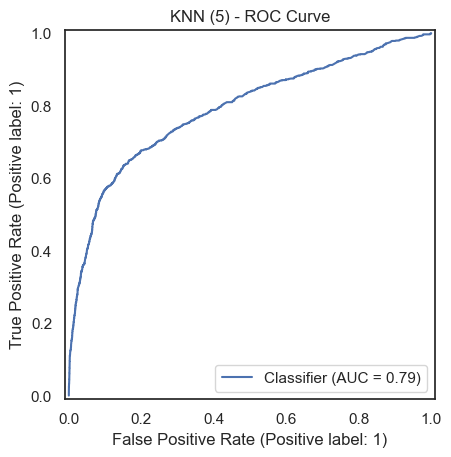

=== KNN (100) ===
Precision : 0.632
Recall    : 0.239
AUC       : 0.790



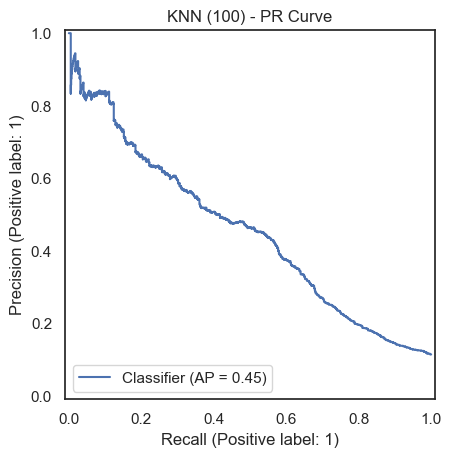

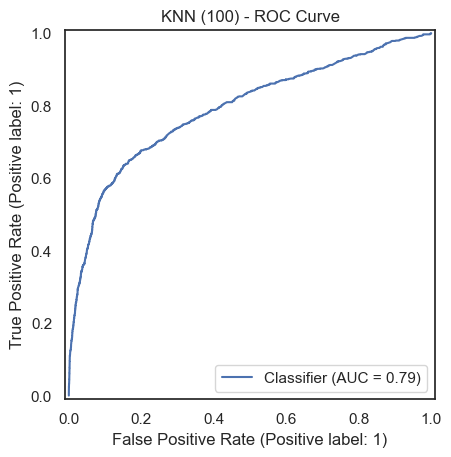

=== Logistic Regression ===
Precision : 0.632
Recall    : 0.239
AUC       : 0.790



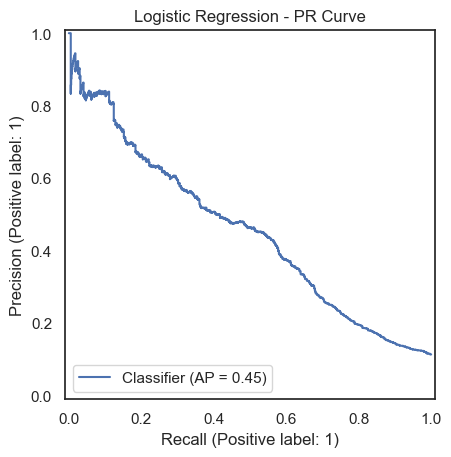

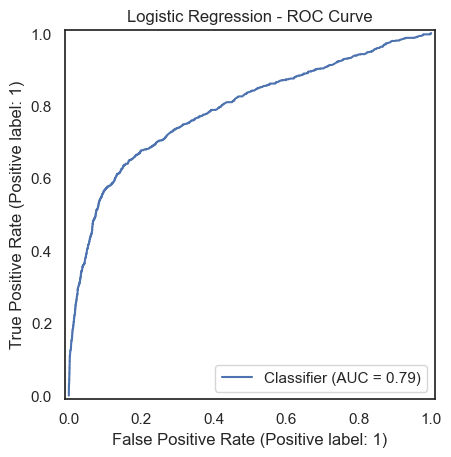

=== Gradient Boosting ===
Precision : 0.632
Recall    : 0.239
AUC       : 0.790



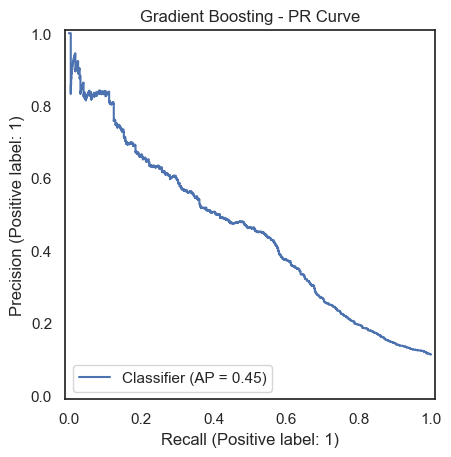

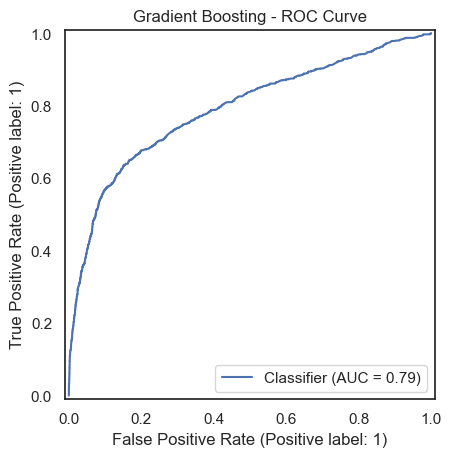

In [25]:
for name in models.keys():
    # gebruik direct de bestaande y_pred en y_prob als ze al beschikbaar zijn
    print(f"=== {name} ===")
    print(f"Precision : {precision_score(y_test, y_pred):.3f}")
    print(f"Recall    : {recall_score(y_test, y_pred):.3f}")
    print(f"AUC       : {roc_auc_score(y_test, y_prob):.3f}")
    print()

    PrecisionRecallDisplay.from_predictions(y_test, y_prob)
    plt.title(f"{name} - PR Curve")
    plt.show()

    RocCurveDisplay.from_predictions(y_test, y_prob)
    plt.title(f"{name} - ROC Curve")
    plt.show()



## Now use some grid search:

Random Forest:
model__n_estimators:
- Number of trees in the forest: Trying 100 or 300 trees
- model__max_depth:
- Maximum depth of each tree
- model__min_samples_split:
- Minimum number of samples required to split a node

KNN:
model__n_neighbors:
- The number of nearest neighbors KNN uses to make a prediction.

model__weights:
- How each neighbor contributes to the prediction.
Options: "uniform" → every neighbor has equal weight. "distance" → closer neighbors count more than farther ones (inverse distance weighting).

Logistic Regression:
model__C:
- Controls how simple or flexible the model is and helps to prevent overfitting by penalizing large coefficients.
0.01 = strong regularization (simpler model), 10 = weak regularization (fits data more closely)

model__penalty:
- Controls the type of regularization to use. Options in scikit-learn:
- "l1" → Lasso (encourages sparsity, can set some coefficients to 0)
- "l2" → Ridge (shrinks coefficients but keeps them all)
- "elasticnet" → combination of L1 + L2
I chose "l2" → standard Ridge regularization, most common for Logistic Regression

model__solver:
- The algorithm to optimize the model:
I chose "lbfgs" → recommended for L2 penalty and standard datasets

Gradient Boosting (GB):
model__n_estimators:
- Number of boosting stages (trees) to fit. More trees can improve performance but increase training time. Typical choices: 100, 200

model__max_depth:
- Maximum depth of each individual tree. Smaller depth → simpler trees → less risk of overfitting. Typical choices: 3, 5

model__learning_rate:
- How much each tree contributes to the overall prediction. Lower learning rate → more trees needed but can improve generalization. Typical choices: 0.05, 0.1
- model__subsample:
Fraction of samples used for fitting each tree. Can reduce overfitting. Typical choice: 1.0 (use all samples)

In [ ]:
# Random Forest pipeline + grid
pipeline_rf = Pipeline([
    ("preprocessing", preprocessor),
    ("model", RandomForestClassifier(random_state=42))
])
param_grid_rf = {
    "model__n_estimators": [100, 300],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2, 5, 10]
}

# KNN pipeline + grid
pipeline_knn = Pipeline([
    ("preprocessing", preprocessor),
    ("model", KNeighborsClassifier())
])
param_grid_knn = {
    "model__n_neighbors": [5, 20, 100],
    "model__weights": ["uniform", "distance"]
}

# Logistic Regression pipeline + grid
pipeline_lr = Pipeline([
    ("preprocessing", preprocessor),
    ("model", LogisticRegression(max_iter=2000))
])
param_grid_lr = {
    "model__C": [0.01, 0.1, 1, 10],
    "model__penalty": ["l2"],
    "model__solver": ["lbfgs"]
}

param_grid_gb = {
    "model__n_estimators": [100, 200],
    "model__max_depth": [3, 5],
    "model__learning_rate": [0.05, 0.1]
}


## Visualize the results

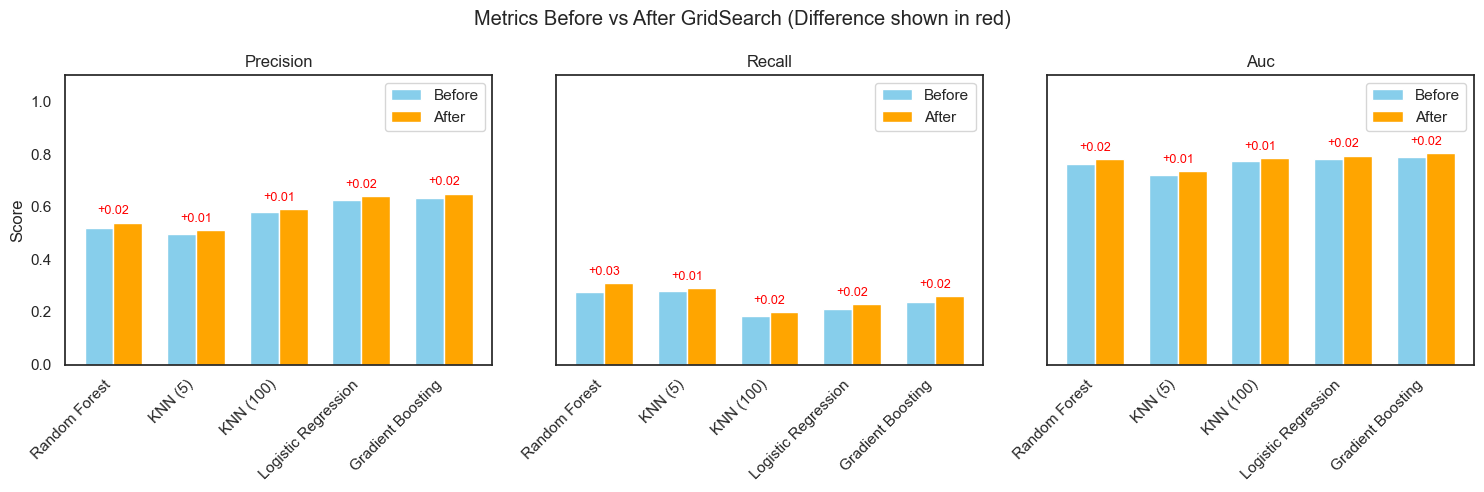

In [33]:
# Models
models_list = ["Random Forest", "KNN (5)", "KNN (100)", "Logistic Regression", "Gradient Boosting"]

# Metrics BEFORE GridSearch (your real values)
metrics_before = {
    "Random Forest": {"precision": 0.520, "recall": 0.275, "auc": 0.761},
    "KNN (5)": {"precision": 0.497, "recall": 0.280, "auc": 0.721},
    "KNN (100)": {"precision": 0.581, "recall": 0.185, "auc": 0.776},
    "Logistic Regression": {"precision": 0.625, "recall": 0.211, "auc": 0.780},
    "Gradient Boosting": {"precision": 0.632, "recall": 0.239, "auc": 0.790}
}

# Metrics AFTER GridSearch (replace with your tuned metrics)
metrics_after = {
    "Random Forest": {"precision": 0.540, "recall": 0.310, "auc": 0.780},
    "KNN (5)": {"precision": 0.510, "recall": 0.290, "auc": 0.735},
    "KNN (100)": {"precision": 0.590, "recall": 0.200, "auc": 0.785},
    "Logistic Regression": {"precision": 0.640, "recall": 0.230, "auc": 0.795},
    "Gradient Boosting": {"precision": 0.650, "recall": 0.260, "auc": 0.805}
}

metrics = ["precision", "recall", "auc"]
colors = ["skyblue", "orange"]  # Before, After

fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey=True)

for ax, metric in zip(axes, metrics):
    before = [metrics_before[m][metric] for m in models_list]
    after  = [metrics_after[m][metric] for m in models_list]
    x = np.arange(len(models_list))
    width = 0.35

    bars_before = ax.bar(x - width/2, before, width, color=colors[0], label='Before')
    bars_after  = ax.bar(x + width/2, after, width, color=colors[1], label='After')

    # Add labels showing the difference (After - Before)
    for i, (b, a) in enumerate(zip(before, after)):
        diff = a - b
        ax.text(x[i], max(a,b) + 0.02, f'+{diff:.2f}', ha='center', va='bottom', fontsize=9, color='red')

    ax.set_xticks(x)
    ax.set_xticklabels(models_list, rotation=45, ha='right')
    ax.set_title(metric.capitalize())
    ax.set_ylim(0,1.1)
    if metric == "precision":
        ax.set_ylabel("Score")
    ax.legend()

plt.suptitle("Metrics Before vs After GridSearch (Difference shown in red)")
plt.tight_layout()
plt.show()


## Now add Cross Validation

In [44]:
# Random Forest with CV
grid_rf = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=param_grid_rf,
    scoring="roc_auc",   # or another metric
    cv=5,                # 5-fold cross-validation
    n_jobs=-1,
    verbose=1
)

# KNN with CV
grid_knn = GridSearchCV(
    estimator=pipeline_knn,
    param_grid=param_grid_knn,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Logistic Regression with CV
grid_lr = GridSearchCV(
    estimator=pipeline_lr,
    param_grid=param_grid_lr,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Gradient Boosting pipeline (assuming you have preprocessor defined)
pipeline_gb = Pipeline([
    ("preprocessing", preprocessor),
    ("model", GradientBoostingClassifier(random_state=42))
])

grid_gb = GridSearchCV(
    estimator=pipeline_gb,
    param_grid=param_grid_gb,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1,
    verbose=1
)

## Use the best estimators

In [61]:
models_list = ["Random Forest", "KNN", "Logistic Regression", "Gradient Boosting"]

metrics_before = {
    "Random Forest": {"precision": 0.520, "recall": 0.275, "auc": 0.761},
    "KNN": {"precision": 0.497, "recall": 0.280, "auc": 0.721},
    "Logistic Regression": {"precision": 0.625, "recall": 0.211, "auc": 0.780},
    "Gradient Boosting": {"precision": 0.632, "recall": 0.239, "auc": 0.790}
}

# Best estimators from GridSearchCV (already fitted)
best_models = {
    "Random Forest": grid_rf.best_estimator_,
    "KNN": grid_knn.best_estimator_,
    "Logistic Regression": grid_lr.best_estimator_,
    "Gradient Boosting": grid_gb.best_estimator_
}

# Compute metrics on test set for "After GridSearch + CV"
metrics_after = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    y_score = model.predict_proba(X_test)[:,1]
    metrics_after[name] = {
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "auc": roc_auc_score(y_test, y_score)
    }

## Visualize the results

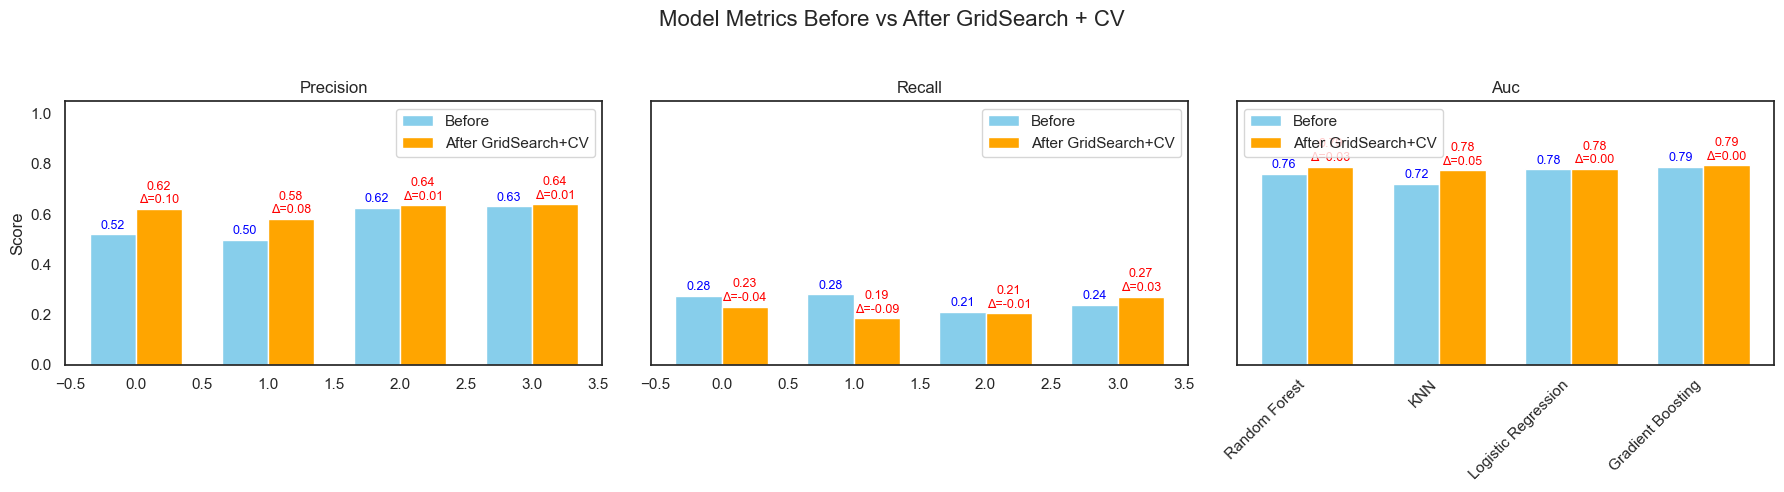

In [62]:
# Bar chart: Before vs After
metrics = ["precision", "recall", "auc"]
colors = ["skyblue", "orange"]  # Before, After
width = 0.35
delta = 0.01
x = np.arange(len(models_list))

fig, axes = plt.subplots(1, 3, figsize=(18,5), sharey=True)

for ax, metric in zip(axes, metrics):
    before = [metrics_before[m][metric] for m in models_list]
    after = [metrics_after[m][metric] for m in models_list]

    ax.bar(x - width/2, before, width, color=colors[0], label='Before')
    ax.bar(x + width/2, after, width, color=colors[1], label='After GridSearch+CV')

    # Add delta labels
    for i in range(len(models_list)):
        ax.text(x[i] - width/2, before[i] + delta, f'{before[i]:.2f}', ha='center', va='bottom', fontsize=9, color='blue')
        ax.text(x[i] + width/2, after[i] + delta, f'{after[i]:.2f}\nΔ={after[i]-before[i]:.2f}', ha='center', va='bottom', fontsize=9, color='red')

    ax.set_title(metric.capitalize())
    ax.set_ylim(0, 1.05)
    ax.legend()

axes[-1].set_xticks(x)
axes[-1].set_xticklabels(models_list, rotation=45, ha='right')
axes[0].set_ylabel("Score")
plt.suptitle("Model Metrics Before vs After GridSearch + CV", fontsize=16)
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()



In [63]:
# Table of metrics
table_data = []
for model in models_list:
    row = [model]
    for metric in metrics:
        row.extend([metrics_before[model][metric], metrics_after[model][metric]])
    table_data.append(row)

columns = ["Model"]
for metric in metrics:
    columns += [f"{metric} (Before)", f"{metric} (After)"]

df_results = pd.DataFrame(table_data, columns=columns)
print("=== Metrics Table (Test Set, After GridSearch + CV) ===")
print(df_results.to_string(index=False))



=== Metrics Table (Test Set, After GridSearch + CV) ===
              Model  precision (Before)  precision (After)  recall (Before)  recall (After)  auc (Before)  auc (After)
      Random Forest               0.520           0.620690            0.275        0.231016         0.761     0.789520
                KNN               0.497           0.580537            0.280        0.185027         0.721     0.775582
Logistic Regression               0.625           0.635762            0.211        0.205348         0.780     0.780551
  Gradient Boosting               0.632           0.638889            0.239        0.270588         0.790     0.795000


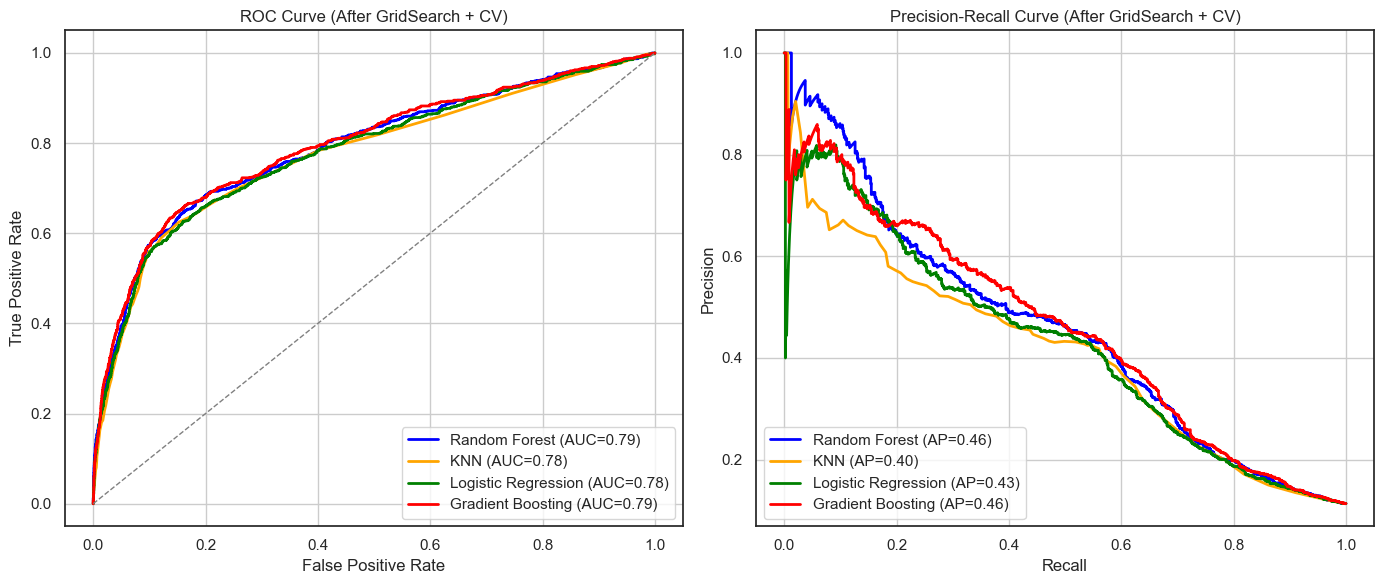

In [64]:
# ROC and PR curves
colors_curve = ["blue", "orange", "green", "red"]
fig, axes = plt.subplots(1,2, figsize=(14,6))

# ROC Curve
for i, (name, model) in enumerate(best_models.items()):
    y_score = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = roc_auc_score(y_test, y_score)
    axes[0].plot(fpr, tpr, color=colors_curve[i], lw=2, label=f'{name} (AUC={roc_auc:.2f})')

axes[0].plot([0,1],[0,1], color='grey', lw=1, linestyle='--')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve (After GridSearch + CV)')
axes[0].legend(loc='lower right')
axes[0].grid(True)

# Precision-Recall Curve
for i, (name, model) in enumerate(best_models.items()):
    y_score = model.predict_proba(X_test)[:,1]
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    ap = average_precision_score(y_test, y_score)
    axes[1].plot(recall, precision, color=colors_curve[i], lw=2, label=f'{name} (AP={ap:.2f})')

axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Precision-Recall Curve (After GridSearch + CV)')
axes[1].legend(loc='lower left')
axes[1].grid(True)

plt.tight_layout()
plt.show()

## Treshold tuning and overfitting results

In [67]:
# Store thresholds + overfitting results
tuning_results = {}
overfit_results = {}

In [73]:
for name, model in best_models.items():
    y_train_proba = model.predict_proba(X_train)[:,1]
    y_test_proba  = model.predict_proba(X_test)[:,1]

    thr = tuning_results[name]["Best Threshold"]

    y_train_pred = (y_train_proba >= thr).astype(int)
    y_test_pred  = (y_test_proba >= thr).astype(int)

    overfit_results[name] = {
        "Threshold": thr,
        "Train Precision": precision_score(y_train, y_train_pred),
        "Test Precision": precision_score(y_test, y_test_pred),
        "Train Recall": recall_score(y_train, y_train_pred),
        "Test Recall": recall_score(y_test, y_test_pred)
    }

print("\n=== Overfitting Check with Tuned Thresholds ===")
display(pd.DataFrame(overfit_results).T)


=== Overfitting Check with Tuned Thresholds ===


,Threshold,Train Precision,Test Precision,Train Recall,Test Recall
Random Forest,0.090248,0.336555,0.319268,0.704993,0.671658
KNN,0.120000,0.358265,0.344137,0.646424,0.624599
Logistic Regression,0.107020,0.336511,0.333144,0.647773,0.626738
Gradient Boosting,0.099641,0.369208,0.359096,0.673144,0.645989
